In [1]:
from tsunami_wave import wave_simulation
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [3]:
bshc = Image.open('bshc.jpeg');
print(bshc.format)
print(bshc.size)
print(bshc.mode)

JPEG
(225, 225)
RGB


In [4]:
bshc_data = np.asarray(bshc)
 
print(type(bshc_data))
print(bshc_data.shape)

<class 'numpy.ndarray'>
(225, 225, 3)


In [5]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [6]:
bshc_data_gray = rgb2gray(bshc_data)

In [7]:
max_bshc_data_gray = max(list(map(max, bshc_data_gray)))
print(max_bshc_data_gray)

254.3875


In [8]:
bshc_data_gray /= (max_bshc_data_gray * 1.5)
print(bshc_data_gray)

[[0.38003335 0.38545998 0.38473326 0.39048695 0.41877058 0.43792508
  0.40593923 0.35539639 0.26630239 0.3771147  0.40370223 0.43201389
  0.36442409 0.27773639 0.32498845 0.32236804 0.37003207 0.39810158
  0.33801792 0.31443421 0.32512997 0.43750892 0.25489172 0.32444781
  0.32990274 0.34888769 0.32457727 0.30193438 0.44627114 0.27856479
  0.28013143 0.35160926 0.4173617  0.40682345 0.31214532 0.36433944
  0.4091852  0.35842825 0.26450513 0.34835831 0.39633735 0.40284605
  0.42462097 0.45568251 0.42755665 0.42717324 0.43427946 0.33010506
  0.33509167 0.29837761 0.41854494 0.42154875 0.36963687 0.43523181
  0.42380935 0.35179035 0.33284995 0.37234193 0.3941897  0.45561411
  0.46406106 0.49557886 0.56040699 0.47688087 0.34082912 0.40858821
  0.4697985  0.36417041 0.29881762 0.21939364 0.25439982 0.25623691
  0.30359013 0.30099802 0.40554404 0.33036372 0.41367599 0.38304267
  0.41470172 0.38506557 0.46759425 0.45286895 0.4804256  0.51892015
  0.47910111 0.36977053 0.30669484 0.30928695 0.

In [9]:
print(bshc_data_gray.shape)

(225, 225)


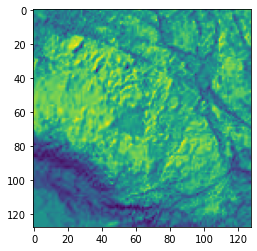

In [10]:
b = np.zeros((128, 128))
b[:, :] = bshc_data_gray[0:128, 0:128]
plt.imshow(b)

In [35]:
wave_simulation(128, (64, 64), 5000, 0.0002, 0.999)

array([[2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.  

In [38]:
for i in range(0, 500):
    data = np.load(f"out_{i*10}.data.npy")
    plt.figure()
    plt.imshow(data)
    plt.colorbar()
    plt.savefig(f"frame_{i}.png")
    plt.close()

In [39]:
with imageio.get_writer('test.gif', mode='I', fps=50) as writer:
    for i in range(0, 500):
        image = imageio.imread(f"frame_{i}.png")
        writer.append_data(image)

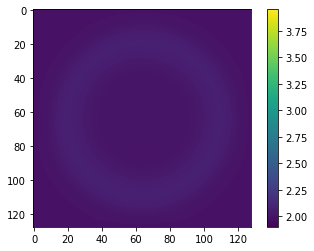

In [22]:
data = np.load(f"out_4000.data.npy")
plt.figure()
plt.imshow(data, vmin=1.9, vmax=4.00)
plt.colorbar()